<a href="https://colab.research.google.com/github/asim5800/azure/blob/main/i2i_borrower_APP_REVIEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all

# Top apps for our rivalry

1 12 club (com.twelve.club)

2 Lendenclub investment (com.innofinsolutions.lendenclub.lender)

3 Lendenclub borrower (com.innofinsolutions.instamoney)

4 Faircent (com.app.faircent)

5 Lendbox(in.lendbox.app)

6 Rupeecircle(com.fintelligence.rupeecircle)

7 i2i funding (com.i2ifunding_investorapp)

8 i2i borrower (com.i2iborrower)
 

In [3]:
# Define and configure Google Play Scraper library
phonepe_users_reviews = reviews_all(
    'com.i2iborrower',
    sleep_milliseconds=0,
    #lang='chi', # Default language is 'en', set language to Chinese.
    #country='hk', # Default country is 'us', set country to Hong Kong.
    count=100000, # defaults to 100
    sort=Sort.MOST_RELEVANT, # Default is Sort.MOST_RELEVANT.
)

In [4]:
# Convert collected reviews data into dataframe
df_reviews = pd.DataFrame(np.array(phonepe_users_reviews),columns=['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))
# Display dataframe header
df_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,26eb002b-fbde-49df-9202-c49c7cfb85c0,Shikha 21hnd1351,https://play-lh.googleusercontent.com/a-/ACB-R...,"My loan pending because of salary slip, but i ...",5,2,6.7,2023-04-28 11:16:22,None,NaT,6.7
1,f6d0efa8-4b3e-4b57-991c-35b2e38236a3,Debkanta Chatterjee,https://play-lh.googleusercontent.com/a-/ACB-R...,It's a totally data collecting app...fake...af...,1,16,6.5,2023-03-24 06:39:34,None,NaT,6.5
2,3dd4528b-1d41-4d9b-b6aa-ee5f1fb85815,kiran saini,https://play-lh.googleusercontent.com/a-/ACB-R...,Instant and Easy Personal Loan app is a great ...,5,4,None,2023-04-18 15:50:28,None,NaT,None
3,ceab94a2-c950-4a27-aca5-e7d507a95beb,Chetna Sheelwal,https://play-lh.googleusercontent.com/a/AGNmyx...,It's a very useful app easy for borrow nice ex...,5,0,6.7,2023-04-18 12:44:19,None,NaT,6.7
4,65afaded-b2a5-4719-8db9-9ac8854bee2c,Raju Donakanti,https://play-lh.googleusercontent.com/a/AGNmyx...,Good app fast approaching good team work emerg...,5,1,6.7,2023-04-27 05:31:54,None,NaT,6.7


In [5]:
# Check dataframe information
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              1550 non-null   object        
 1   userName              1550 non-null   object        
 2   userImage             1550 non-null   object        
 3   content               1550 non-null   object        
 4   score                 1550 non-null   int64         
 5   thumbsUpCount         1550 non-null   int64         
 6   reviewCreatedVersion  1094 non-null   object        
 7   at                    1550 non-null   datetime64[ns]
 8   replyContent          750 non-null    object        
 9   repliedAt             750 non-null    datetime64[ns]
 10  appVersion            1094 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 133.3+ KB


In [6]:
#df_reviews.to_csv('12club_review.csv')

In [7]:
# Count number of review scores
df_reviews['score'].value_counts()

5    902
1    586
3     29
4     17
2     16
Name: score, dtype: int64

<Axes: ylabel='score'>

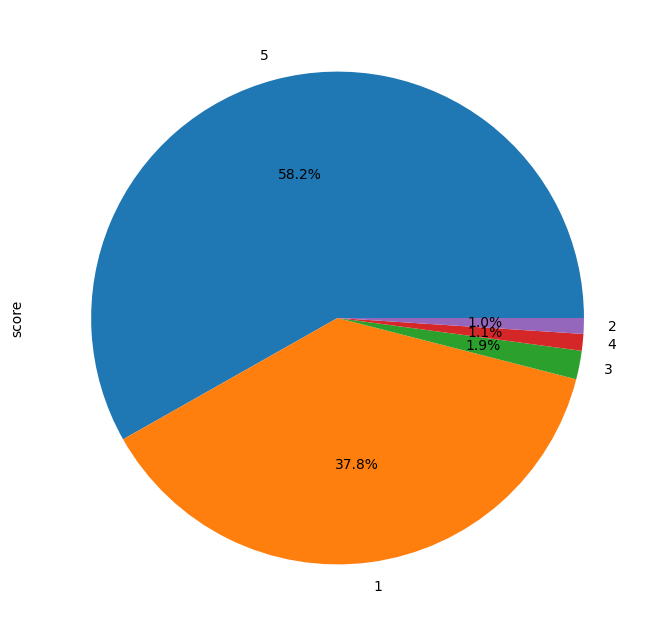

In [8]:
# Visualize review scores as pie chart  
df_reviews['score'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')

In [9]:
# Create new dataframe with review content and score for further analysis
df_reviews_content = pd.DataFrame(df_reviews, columns=['content','score'])

In [10]:
# Display new dataframe header
df_reviews_content.head()

,content,score
0,"My loan pending because of salary slip, but i ...",5
1,It's a totally data collecting app...fake...af...,1
2,Instant and Easy Personal Loan app is a great ...,5
3,It's a very useful app easy for borrow nice ex...,5
4,Good app fast approaching good team work emerg...,5


Install azure text analytics API

In [11]:
pip install azure-ai-textanalytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.9/173.9 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.4 MB/s eta 0:00:00


In [12]:
# Import necessary libraries
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [13]:
# Define the service key and endpoint of Azure Text Analytics
key = "4f40f49470f34ce2b1758902d75c182c"
endpoint = "https://mycognitiveserviceresource12345.cognitiveservices.azure.com/"

In [14]:
# Configure Azure Text Analytics client library
ta_credential = AzureKeyCredential(key)
text_analytics_client = TextAnalyticsClient(
        endpoint=endpoint, 
        credential=ta_credential)
client = text_analytics_client

reviews_content_sentiment = []

# Pass review content to Azure Text Analytics and collect sentiment result
for index, headers in df_reviews_content.iterrows():
    reviews_content = str(headers['content'])
    print("Review Content: {}".format(reviews_content))
    documents = [reviews_content]
    response = client.analyze_sentiment(documents=documents, language="zh-hant")[0]
    sentiment = response.sentiment
    print("Review Content Sentiment: {}".format(sentiment))
    reviews_score = str(headers['score'])
    print("Review Content Score: {}".format(reviews_score))
    reviews_content_sentiment.append([reviews_content, sentiment, reviews_score])

# Convert collected news headers with sentiment to Pandas dataframes.
reviews_content_sentiment = pd.DataFrame(reviews_content_sentiment, columns=['content','sentiment','reviews_score'])

Review Content: My loan pending because of salary slip, but i am very happy with the customer support and response with the app Team which i never seen in any other credit app, Thankyou..
Review Content Sentiment: positive
Review Content Score: 5
Review Content: It's a totally data collecting app...fake...after the document update....app totally denied to login. Fake app...
Review Content Sentiment: negative
Review Content Score: 1
Review Content: Instant and Easy Personal Loan app is a great tool for those in need of urgent financial assistance. The app is user-friendly and easy to navigate, making the borrowing process seamless. It is important to note, however, that the app should only be used for urgent needs and to borrow responsibly, as it is not advisable to take on debt with a negative financial outlook or bad credit rating. Overall, the app is a useful tool for those in need of fast and easy personal loans, especially from PSU's
Review Content Sentiment: mixed
Review Content S

In [15]:
# Count number of review content sentiment
reviews_content_sentiment['sentiment'].value_counts()

positive    898
negative    463
neutral     153
mixed        36
Name: sentiment, dtype: int64

<Axes: ylabel='content'>

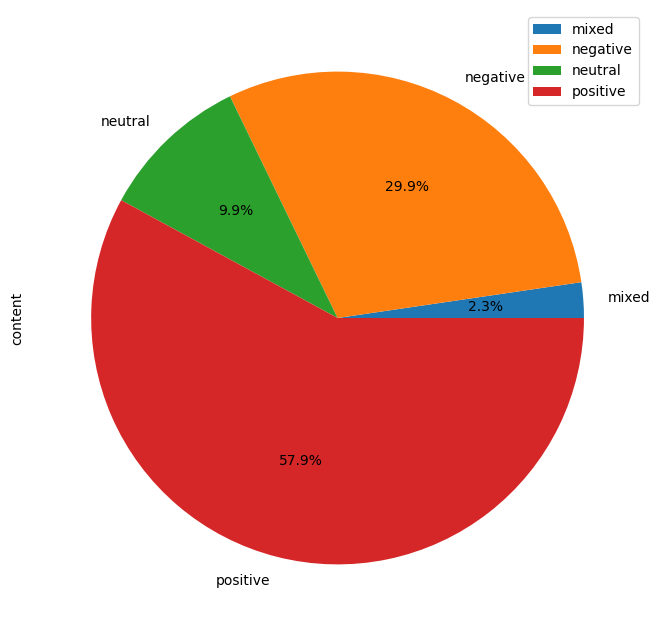

In [16]:
# Visualize review content sentiment as pie chart.
reviews_content_sentiment.groupby(['sentiment']).count().plot(kind='pie', y='content', figsize=(8,8), autopct='%1.1f%%')

In [17]:
# Group by sentiment & reviews_score
reviews_content_sentiment.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
mixed      1                 31
           2                  1
           3                  1
           5                  3
negative   1                429
           2                  8
           3                  9
           4                  3
           5                 14
neutral    1                 87
           2                  4
           3                  8
           4                  2
           5                 52
positive   1                 39
           2                  3
           3                 11
           4                 12
           5                833
Name: content, dtype: int64

<Axes: xlabel='sentiment'>

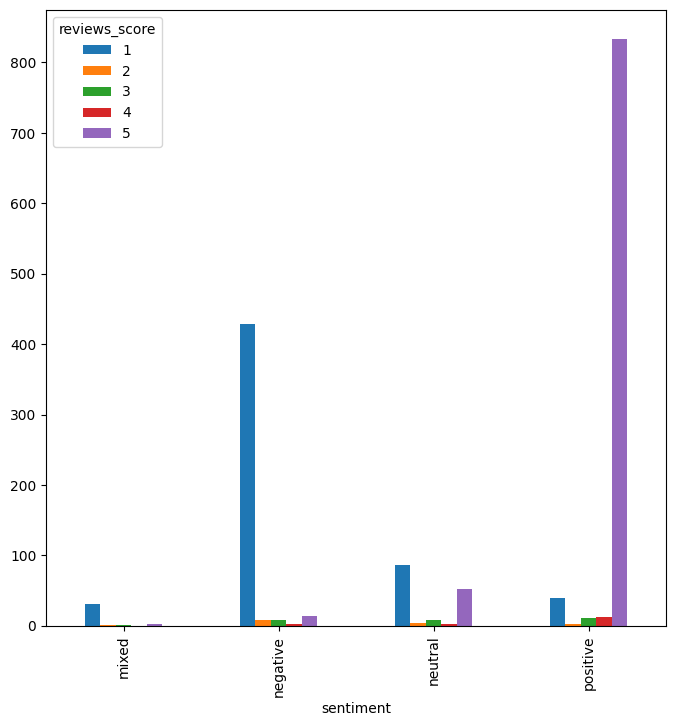

In [18]:
# Visual sentiment & reviews_score as bar chart
pd.crosstab(reviews_content_sentiment['sentiment'],reviews_content_sentiment['reviews_score']).plot.bar(figsize=(8,8))

In [19]:
# Check dataframe information
reviews_content_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        1550 non-null   object
 1   sentiment      1550 non-null   object
 2   reviews_score  1550 non-null   object
dtypes: object(3)
memory usage: 36.5+ KB


In [20]:
#reviews_content_sentiment.head()

In [21]:
reviews_content_sentiment.to_csv('i2iborrower.csv')
reviews_content_sentiment.head()

,content,sentiment,reviews_score
0,"My loan pending because of salary slip, but i ...",positive,5
1,It's a totally data collecting app...fake...af...,negative,1
2,Instant and Easy Personal Loan app is a great ...,mixed,5
3,It's a very useful app easy for borrow nice ex...,positive,5
4,Good app fast approaching good team work emerg...,positive,5


In [22]:
# Create new dataframe to perform factorization
reviews_content_sentiment_factorized = reviews_content_sentiment.copy()

In [23]:
# Perform factorization for sentiment column
reviews_content_sentiment_factorized.sentiment = pd.factorize(reviews_content_sentiment_factorized.sentiment)[0]

In [24]:
# Convert reviews_score column data type to intager
reviews_content_sentiment_factorized['reviews_score'] = reviews_content_sentiment_factorized['reviews_score'].astype(int)

In [25]:
# Check dataframe information
reviews_content_sentiment_factorized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        1550 non-null   object
 1   sentiment      1550 non-null   int64 
 2   reviews_score  1550 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 36.5+ KB


In [26]:
# Group by sentiment (factorized) & reviews_score
reviews_content_sentiment_factorized.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
0          1                 39
           2                  3
           3                 11
           4                 12
           5                833
1          1                429
           2                  8
           3                  9
           4                  3
           5                 14
2          1                 31
           2                  1
           3                  1
           5                  3
3          1                 87
           2                  4
           3                  8
           4                  2
           5                 52
Name: content, dtype: int64

After factorization of sentiment column, below is numberic values the mapping.

0 = Neutral
1 = Negative
2 = Positive
3 = Mixed

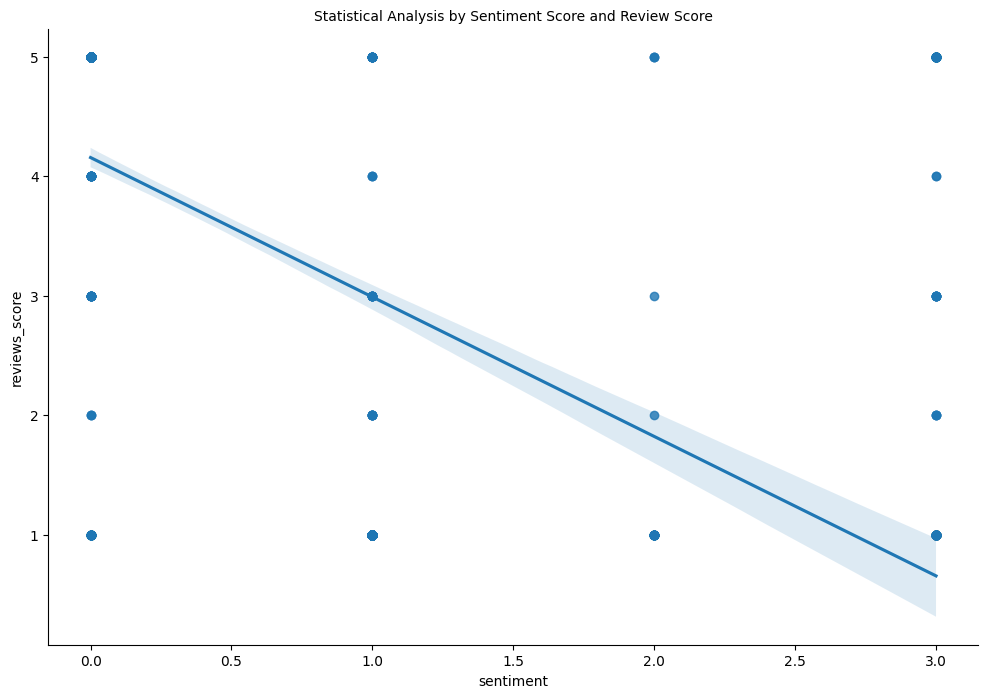

In [27]:
# Plotting sentiment & reviews_score columns relationship by Seaborn.
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.title('Statistical Analysis by Sentiment Score and Review Score', fontsize=10)
sns.regplot(x='sentiment', y= 'reviews_score', data=reviews_content_sentiment_factorized)
sns.despine()

Data Analysis from Visualization

Positive sentiment (2) from review content is trending to higher reivew score.

Negative sentiment (1) from review content is trending to lower review score.

Neutral sentiment (0) from review content is trending to lower review score.

In other word, lower review score is trending to Neutral sentiment (0).

From this observation, if sentiment is negative to neutral, user would give lower review score.